**Thu May 8, 2025 at 4:13 PM**

พายุเข้าตอน 5:40 PM 🌧

### Customer Lifetime Value (CLV)

> **Assignment 5**

“CLV คือมูลค่าที่ลูกค้าคนหนึ่งจะสร้างให้กับธุรกิจตลอดช่วงเวลาที่เป็นลูกค้า”

Why CLV matters:
* Predict long-term revenue 💹
* Optimize marketing spend 📦
* Identify high-value customers 🤩
* Guide retention strategy 👨‍💻

**📌 CLV = ARPU × Lifespan**

Where:
* ARPU (Average Revenue Per User) = Total Revenue / Number of Orders
* Lifespan = ระยะเวลาที่ลูกค้าอยู่กับเรา (เดือน/วัน)

➡️ Real-world example:
"ถ้าค่าบริการเฉลี่ยของลูกค้าคือ ฿800/เดือน และลูกค้าใช้งานเฉลี่ย 4 เดือน → CLV = ฿3,200"

In [1]:
#!/usr/bin/env python3
# Christopher French
# 650510714
# customer_lifetime_value
# 229496 Sec DS

In [2]:
#!pip install matplotlib seaborn

In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import math
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# show all columns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#### **Dataset**

The file contains data with a million of rows, use Python to retrieve the data from the file

> **Churn**

“Churn คือการที่ลูกค้าเลิกใช้งานโดยไม่กลับมาอีกภายในเวลาที่กำหนด เช่น 90 วัน”

⚠️ Highlight:
* The threshold is assumed, not absolute
* Sensitivity testing can validate assumptions


➡️ Code walkthrough: df['is_churned'] = df['days_since_last'] > 90

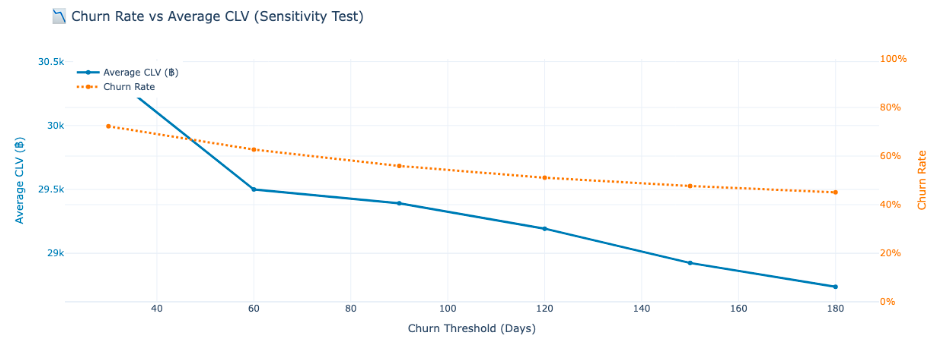

**Interpretation**
1. Churn Rate Drops Slowly with Higher Thresholds
  * When you increase the threshold (e.g., from 30 → 90 → 180 days), the churn rate gradually declines.
  * This suggests some customers may return late, but most drop off early.

2. Average CLV Drops More Sharply
  * The highest-value customers are those who engage frequently and early.
  * As you increase the churn window, you include more low-value long-tail customers, which lowers the average CLV.

In [5]:
data = pd.read_csv('booking_raw.csv')
data

,booking_id,user_id,is_new_customer,user_place_id,place_size,service_name,sub_service_name,extra_service,province,district,booking_date,cleaning_date,is_sameday,work_hour,additional_hour,total_price,discount_cost,credit_discount_cost,promo_code,discount_pct,booking_status,cancel_reason,professional_id,selected_professional_id,is_new_professional,rating,problem,is_claimed_booking
0,23,31251,1,0,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,2016-03-23 08:50:10,2016-03-26 13:00:00,0,2.0,0.0,400.0,0.0,0.0,NaN,NaN,เสร็จสิ้น,NaN,8,0,1,4.0,NaN,0
1,24,3,1,0,คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,2016-03-24 21:14:38,2016-03-28 13:00:00,0,2.5,0.0,500.0,0.0,0.0,NaN,NaN,เสร็จสิ้น,NaN,5,0,1,NaN,NaN,0
2,25,3,0,0,คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,2016-03-26 20:56:23,2016-03-31 17:00:00,0,2.5,0.0,500.0,0.0,0.0,NaN,NaN,เสร็จสิ้น,NaN,7,0,0,5.0,NaN,0
3,26,3,0,0,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,2016-03-26 20:58:36,2016-03-31 13:00:00,0,2.0,0.0,400.0,0.0,0.0,NaN,NaN,เสร็จสิ้น,NaN,7,0,0,5.0,NaN,0
4,27,3,0,0,คอนโด 1 ห้องนอน (ไม่เกิน 50 ตร.ม.),บริการทำความสะอาด,NaN,NaN,เชียงใหม่,NaN,2016-03-26 21:04:26,2016-04-01 13:00:00,0,2.5,0.0,500.0,0.0,0.0,NaN,NaN,เสร็จสิ้น,NaN,8,0,0,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135055,250401ZPCC,206782,0,296240,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาด,NaN,NaN,กรุงเทพ และปริมณฑล,เขตพระโขนง,2025-05-08 15:07:28,2025-05-14 14:00:00,0,2.0,0.0,520.0,26.0,0.0,PACK_5,5.0,รอเข้าให้บริการ,NaN,11886,0,0,NaN,NaN,0
1135056,250508042C,232646,0,155725,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาดห้องน้ำ,2 ห้องน้ำ (30-40 ตร.ม.),NaN,กรุงเทพ และปริมณฑล,เขตวัฒนา,2025-05-08 15:08:58,2025-06-07 10:00:00,0,2.0,0.0,500.0,30.0,0.0,Mayday5,6.0,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,11292,0,NaN,NaN,0
1135057,250508ZGX6,232646,0,155725,คอนโด 1 ห้องนอน (ไม่เกิน 40 ตร.ม.),บริการทำความสะอาดห้องน้ำ,2 ห้องน้ำ (30-40 ตร.ม.),NaN,กรุงเทพ และปริมณฑล,เขตวัฒนา,2025-05-08 15:09:45,2025-06-21 10:00:00,0,2.0,0.0,500.0,30.0,0.0,Mayday5,6.0,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,11292,0,NaN,NaN,0
1135058,2505085NC4,173130,0,104775,บ้าน 1 ชั้น (ไม่เกิน 100 ตร.ม.),บริการทำความสะอาด,NaN,NaN,กรุงเทพ และปริมณฑล,เขตบางแค,2025-05-08 15:10:08,2025-05-10 09:30:00,0,2.0,0.0,520.0,0.0,0.0,NaN,NaN,ยังไม่มีคุณแม่บ้านกดรับงาน,NaN,0,12414,0,NaN,NaN,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135060 entries, 0 to 1135059
Data columns (total 28 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   booking_id                1135060 non-null  object 
 1   user_id                   1135060 non-null  int64  
 2   is_new_customer           1135060 non-null  int64  
 3   user_place_id             1135060 non-null  int64  
 4   place_size                1109181 non-null  object 
 5   service_name              1135060 non-null  object 
 6   sub_service_name          26417 non-null    object 
 7   extra_service             38345 non-null    object 
 8   province                  1135060 non-null  object 
 9   district                  1055083 non-null  object 
 10  booking_date              1135060 non-null  object 
 11  cleaning_date             1122742 non-null  object 
 12  is_sameday                1135060 non-null  int64  
 13  work_hour                 1

#### **Data Preprocessing and Exploratory Data Analysis (EDA)**

I won't be using discount factor but I will only use total_price as the main factor for calculate CLV instead.

In [7]:
# Checking every column names
data.columns

Index(['booking_id', 'user_id', 'is_new_customer', 'user_place_id',
       'place_size', 'service_name', 'sub_service_name', 'extra_service',
       'province', 'district', 'booking_date', 'cleaning_date', 'is_sameday',
       'work_hour', 'additional_hour', 'total_price', 'discount_cost',
       'credit_discount_cost', 'promo_code', 'discount_pct', 'booking_status',
       'cancel_reason', 'professional_id', 'selected_professional_id',
       'is_new_professional', 'rating', 'problem', 'is_claimed_booking'],
      dtype='object')

In [8]:
# Feature Selection
df = data[["user_id", "province", "total_price", "booking_date", "booking_id", "booking_status"]]
df

,user_id,province,total_price,booking_date,booking_id,booking_status
0,31251,เชียงใหม่,400.0,2016-03-23 08:50:10,23,เสร็จสิ้น
1,3,เชียงใหม่,500.0,2016-03-24 21:14:38,24,เสร็จสิ้น
2,3,เชียงใหม่,500.0,2016-03-26 20:56:23,25,เสร็จสิ้น
3,3,เชียงใหม่,400.0,2016-03-26 20:58:36,26,เสร็จสิ้น
4,3,เชียงใหม่,500.0,2016-03-26 21:04:26,27,เสร็จสิ้น
...,...,...,...,...,...,...
1135055,206782,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:07:28,250401ZPCC,รอเข้าให้บริการ
1135056,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:08:58,250508042C,ยังไม่มีคุณแม่บ้านกดรับงาน
1135057,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:09:45,250508ZGX6,ยังไม่มีคุณแม่บ้านกดรับงาน
1135058,173130,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:10:08,2505085NC4,ยังไม่มีคุณแม่บ้านกดรับงาน


In [9]:
# Checking every column's missing data & data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135060 entries, 0 to 1135059
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1135060 non-null  int64  
 1   province        1135060 non-null  object 
 2   total_price     1135060 non-null  float64
 3   booking_date    1135060 non-null  object 
 4   booking_id      1135060 non-null  object 
 5   booking_status  1135060 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 52.0+ MB


In [10]:
df.booking_status.value_counts()

booking_status
เสร็จสิ้น                     1069849
ยกเลิก                          42590
ยังไม่ระบุวันเข้าให้บริการ      11373
รอเข้าให้บริการ                 11078
ยังไม่มีคุณแม่บ้านกดรับงาน        170
Name: count, dtype: int64

> **booking_status**

* เสร็จสิ้น >>> Paid ✅
* ยกเลิก >>> Paid (Refund is pending) ✅
* ยังไม่ระบุวันเข้าให้บริการ >>> Paid ✅
* รอเข้าให้บริการ	>>> Paid ✅
* ยังไม่มีคุณแม่บ้านกดรับงาน >>> Paid ✅

✅ Include "cancel" if:
The user was charged.
* You want to assess gross revenue or intent to purchase.
* You're measuring CLV as a reflection of payment behavior.

❌ Exclude "cancel" if:
You're calculating net revenue after refunds.
* The refund is almost always completed (i.e., no financial gain).
* You want a conservative or realized CLV metric.

Best practice:
If possible, separate CLV into two versions:

1. `CLV_gross`: includes canceled bookings that were paid.

2. `CLV_net`: excludes them or subtracts refunded amounts.


#### **Customer Lifetime Value (CLV)**
Mainly focus on CLV with CLV_gross version which includes canceled bookings that were paid

In [11]:
# Split booking_date into two new columns
df[["date", "time"]] = df["booking_date"].str.split(" ", expand=True)
df.head()

,user_id,province,total_price,booking_date,booking_id,booking_status,date,time
0,31251,เชียงใหม่,400.0,2016-03-23 08:50:10,23,เสร็จสิ้น,2016-03-23,08:50:10
1,3,เชียงใหม่,500.0,2016-03-24 21:14:38,24,เสร็จสิ้น,2016-03-24,21:14:38
2,3,เชียงใหม่,500.0,2016-03-26 20:56:23,25,เสร็จสิ้น,2016-03-26,20:56:23
3,3,เชียงใหม่,400.0,2016-03-26 20:58:36,26,เสร็จสิ้น,2016-03-26,20:58:36
4,3,เชียงใหม่,500.0,2016-03-26 21:04:26,27,เสร็จสิ้น,2016-03-26,21:04:26


##### **Calculate each unique user_id age**

In [12]:
# Convert "date" to datetime
df["date"] = pd.to_datetime(df["date"])

# Calculate the minimum (first date for each unique user_id)
min_dates = df.groupby("user_id")["date"].min()
min_dates.head()

user_id
1    2017-05-04
3    2016-03-24
11   2016-03-30
13   2016-04-02
15   2016-04-09
Name: date, dtype: datetime64[ns]

In [13]:
# Calculate user age (in months)
df["user_age_months"] = (df["date"] - df.groupby("user_id")["date"].transform("min")).dt.days / 30.44 # Approximating days in a month

# Convert to integer months
df["user_age_months"] = df["user_age_months"].astype(int)
df

,user_id,province,total_price,booking_date,booking_id,booking_status,date,time,user_age_months
0,31251,เชียงใหม่,400.0,2016-03-23 08:50:10,23,เสร็จสิ้น,2016-03-23,08:50:10,0
1,3,เชียงใหม่,500.0,2016-03-24 21:14:38,24,เสร็จสิ้น,2016-03-24,21:14:38,0
2,3,เชียงใหม่,500.0,2016-03-26 20:56:23,25,เสร็จสิ้น,2016-03-26,20:56:23,0
3,3,เชียงใหม่,400.0,2016-03-26 20:58:36,26,เสร็จสิ้น,2016-03-26,20:58:36,0
4,3,เชียงใหม่,500.0,2016-03-26 21:04:26,27,เสร็จสิ้น,2016-03-26,21:04:26,0
...,...,...,...,...,...,...,...,...,...
1135055,206782,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:07:28,250401ZPCC,รอเข้าให้บริการ,2025-05-08,15:07:28,1
1135056,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:08:58,250508042C,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:08:58,24
1135057,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:09:45,250508ZGX6,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:09:45,24
1135058,173130,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:10:08,2505085NC4,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:10:08,0


##### **Calculate ARPU (Average Revenue Per User)**

`ARPU (Average Revenue Per User) = Total Revenue / Number of Orders`

In [14]:
# Calculate total_revenue for each user
df["total_revenue"] = df.groupby("user_id")["total_price"].transform("sum")

# Calculate Number of Orders for each user
df["number_of_orders"] = df.groupby("user_id")["booking_id"].transform("count")

# Calculate ARPU
df["ARPU"] = df["total_revenue"] / df["number_of_orders"]
df

,user_id,province,total_price,booking_date,booking_id,booking_status,date,time,user_age_months,total_revenue,number_of_orders,ARPU
0,31251,เชียงใหม่,400.0,2016-03-23 08:50:10,23,เสร็จสิ้น,2016-03-23,08:50:10,0,400.00,1,400.000000
1,3,เชียงใหม่,500.0,2016-03-24 21:14:38,24,เสร็จสิ้น,2016-03-24,21:14:38,0,462223.98,906,510.180993
2,3,เชียงใหม่,500.0,2016-03-26 20:56:23,25,เสร็จสิ้น,2016-03-26,20:56:23,0,462223.98,906,510.180993
3,3,เชียงใหม่,400.0,2016-03-26 20:58:36,26,เสร็จสิ้น,2016-03-26,20:58:36,0,462223.98,906,510.180993
4,3,เชียงใหม่,500.0,2016-03-26 21:04:26,27,เสร็จสิ้น,2016-03-26,21:04:26,0,462223.98,906,510.180993
...,...,...,...,...,...,...,...,...,...,...,...,...
1135055,206782,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:07:28,250401ZPCC,รอเข้าให้บริการ,2025-05-08,15:07:28,1,2600.00,5,520.000000
1135056,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:08:58,250508042C,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:08:58,24,37040.00,70,529.142857
1135057,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:09:45,250508ZGX6,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:09:45,24,37040.00,70,529.142857
1135058,173130,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:10:08,2505085NC4,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:10:08,0,1170.00,2,585.000000


##### **Calculate CLV**

In [15]:
# Calculate Customer Lifetime Value
df["CLV"] = df["ARPU"] * df["user_age_months"]
df

,user_id,province,total_price,booking_date,booking_id,booking_status,date,time,user_age_months,total_revenue,number_of_orders,ARPU,CLV
0,31251,เชียงใหม่,400.0,2016-03-23 08:50:10,23,เสร็จสิ้น,2016-03-23,08:50:10,0,400.00,1,400.000000,0.000000
1,3,เชียงใหม่,500.0,2016-03-24 21:14:38,24,เสร็จสิ้น,2016-03-24,21:14:38,0,462223.98,906,510.180993,0.000000
2,3,เชียงใหม่,500.0,2016-03-26 20:56:23,25,เสร็จสิ้น,2016-03-26,20:56:23,0,462223.98,906,510.180993,0.000000
3,3,เชียงใหม่,400.0,2016-03-26 20:58:36,26,เสร็จสิ้น,2016-03-26,20:58:36,0,462223.98,906,510.180993,0.000000
4,3,เชียงใหม่,500.0,2016-03-26 21:04:26,27,เสร็จสิ้น,2016-03-26,21:04:26,0,462223.98,906,510.180993,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135055,206782,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:07:28,250401ZPCC,รอเข้าให้บริการ,2025-05-08,15:07:28,1,2600.00,5,520.000000,520.000000
1135056,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:08:58,250508042C,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:08:58,24,37040.00,70,529.142857,12699.428571
1135057,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:09:45,250508ZGX6,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:09:45,24,37040.00,70,529.142857,12699.428571
1135058,173130,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:10:08,2505085NC4,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:10:08,0,1170.00,2,585.000000,0.000000


In [16]:
# Show the average CLV for each customer
df.groupby("user_id")["CLV"].mean()

user_id
1         39516.800000
3         12996.100603
11            0.000000
13        22259.494957
15            0.000000
              ...     
395496        0.000000
395501        0.000000
395503        0.000000
395504        0.000000
395520        0.000000
Name: CLV, Length: 153632, dtype: float64

In [17]:
# Show the total CLV for each customer
df.groupby("user_id")["CLV"].sum()

user_id
1         5.927520e+05
3         1.177447e+07
11        0.000000e+00
13        4.696753e+06
15        0.000000e+00
              ...     
395496    0.000000e+00
395501    0.000000e+00
395503    0.000000e+00
395504    0.000000e+00
395520    0.000000e+00
Name: CLV, Length: 153632, dtype: float64

In [18]:
# Show the maximum CLV for each customer
df.groupby("user_id")["CLV"].max()

user_id
1         58405.333333
3         53058.823311
11            0.000000
13        77437.511848
15            0.000000
              ...     
395496        0.000000
395501        0.000000
395503        0.000000
395504        0.000000
395520        0.000000
Name: CLV, Length: 153632, dtype: float64

#### **Churn**
Assuming churn threshold is 90 days (a customer won't be coming back to use our services after 90 days)

##### **Thrshold Assumption**

In [19]:
# Assume churn threshold is 90 days
threshold = 90

##### **Find Churn by Threshold**

In [20]:
# Calculate the time difference (last service date)
df["days_since_last"] = (pd.Timestamp.now().normalize() - df.groupby("user_id")["date"].transform("max")).dt.days

# Apply the Threshold
df["is_churn"] = df["days_since_last"] > 90
df

,user_id,province,total_price,booking_date,booking_id,booking_status,date,time,user_age_months,total_revenue,number_of_orders,ARPU,CLV,days_since_last,is_churn
0,31251,เชียงใหม่,400.0,2016-03-23 08:50:10,23,เสร็จสิ้น,2016-03-23,08:50:10,0,400.00,1,400.000000,0.000000,3334,True
1,3,เชียงใหม่,500.0,2016-03-24 21:14:38,24,เสร็จสิ้น,2016-03-24,21:14:38,0,462223.98,906,510.180993,0.000000,162,True
2,3,เชียงใหม่,500.0,2016-03-26 20:56:23,25,เสร็จสิ้น,2016-03-26,20:56:23,0,462223.98,906,510.180993,0.000000,162,True
3,3,เชียงใหม่,400.0,2016-03-26 20:58:36,26,เสร็จสิ้น,2016-03-26,20:58:36,0,462223.98,906,510.180993,0.000000,162,True
4,3,เชียงใหม่,500.0,2016-03-26 21:04:26,27,เสร็จสิ้น,2016-03-26,21:04:26,0,462223.98,906,510.180993,0.000000,162,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135055,206782,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:07:28,250401ZPCC,รอเข้าให้บริการ,2025-05-08,15:07:28,1,2600.00,5,520.000000,520.000000,1,False
1135056,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:08:58,250508042C,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:08:58,24,37040.00,70,529.142857,12699.428571,1,False
1135057,232646,กรุงเทพ และปริมณฑล,500.0,2025-05-08 15:09:45,250508ZGX6,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:09:45,24,37040.00,70,529.142857,12699.428571,1,False
1135058,173130,กรุงเทพ และปริมณฑล,520.0,2025-05-08 15:10:08,2505085NC4,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,15:10:08,0,1170.00,2,585.000000,0.000000,1,False


#### **Practice Through Use Cases**
Finding CLV by months will have more readability more than finding CLV by days
* “Find top 10% customers by CLV”
* “Compare average CLV by province”
* “Plot churn rate if threshold is 60, 90, and 120 days”

➡️ storytelling from the data:
“What’s driving low CLV in April? High churn? Low ARPU?”


##### **Top 10% CLV Customers**

In [21]:
# Calculate 90th percentile
top_10_percentile = df['CLV'].quantile(0.9)

# Filter for top customers
top_customers = df[df['CLV'] >= top_10_percentile]
display(top_customers)

,user_id,province,total_price,booking_date,booking_id,booking_status,date,time,user_age_months,total_revenue,number_of_orders,ARPU,CLV,days_since_last,is_churn
28623,303,กรุงเทพ และปริมณฑล,1200.0,2018-09-08 05:58:25,33753,เสร็จสิ้น,2018-09-08,05:58:25,23,42840.0,32,1338.750000,30791.250000,2353,True
29362,303,กรุงเทพ และปริมณฑล,1200.0,2018-09-18 19:34:09,34655,เสร็จสิ้น,2018-09-18,19:34:09,23,42840.0,32,1338.750000,30791.250000,2353,True
32034,303,กรุงเทพ และปริมณฑล,1200.0,2018-10-20 21:43:44,37913,ยกเลิก,2018-10-20,21:43:44,24,42840.0,32,1338.750000,32130.000000,2353,True
32043,303,กรุงเทพ และปริมณฑล,1200.0,2018-10-21 10:04:25,37924,เสร็จสิ้น,2018-10-21,10:04:25,24,42840.0,32,1338.750000,32130.000000,2353,True
35753,303,กรุงเทพ และปริมณฑล,1200.0,2018-11-29 21:47:20,42441,เสร็จสิ้น,2018-11-29,21:47:20,26,42840.0,32,1338.750000,34807.500000,2353,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135036,135812,เชียงใหม่,960.0,2025-05-08 14:44:34,250508DM34,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,14:44:34,41,94672.0,99,956.282828,39207.595960,1,False
1135037,135812,เชียงใหม่,960.0,2025-05-08 14:44:34,2505086FAZ,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,14:44:34,41,94672.0,99,956.282828,39207.595960,1,False
1135038,135812,เชียงใหม่,960.0,2025-05-08 14:44:34,250508CRN0,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,14:44:34,41,94672.0,99,956.282828,39207.595960,1,False
1135039,135812,เชียงใหม่,960.0,2025-05-08 14:44:34,2505089P2K,ยังไม่มีคุณแม่บ้านกดรับงาน,2025-05-08,14:44:34,41,94672.0,99,956.282828,39207.595960,1,False


##### **Compare average CLV by province**

In [22]:
import plotly.express as px

# Group by province and calculate average CLV
avg_clv_by_province = df.groupby("province")["CLV"].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(
    avg_clv_by_province,
    x="province",
    y="CLV",
    title="Average CLV by Province",
    labels={"CLV": "Average CLV (Thai Baht)"}  # Customize y-axis label
)

# Customize the layout if needed
fig.update_layout(
    xaxis_title="Province",
    yaxis_title="Average CLV (Thai Baht)"
)

fig.show()

##### **Plot churn rate if threshold is 60, 90, and 120 days**

In [23]:
import plotly.express as px

thresholds = [60, 90, 120]  # Specified churn thresholds
churn_rates = []

for threshold in thresholds:
    # Calculate churn rate for the current threshold
    churn_rate = (df['days_since_last'] > threshold).mean() * 100
    churn_rates.append(churn_rate)

# Create a DataFrame for plotting
churn_data = pd.DataFrame({'Threshold (Days)': thresholds, 'Churn Rate (%)': churn_rates})

# Create a bar chart using Plotly Express
fig = px.bar(
    churn_data,
    x='Threshold (Days)',
    y='Churn Rate (%)',
    title="Churn Rate for Different Thresholds",
)

fig.show()

##### **Churn Rate (฿) Over Time**

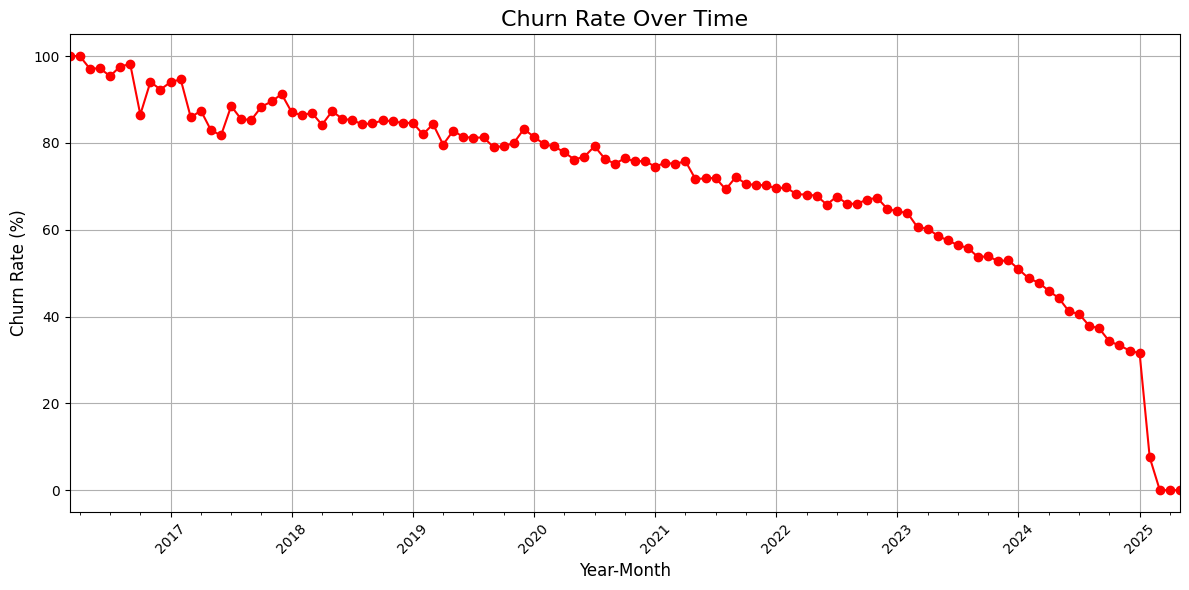

In [28]:
import matplotlib.pyplot as plt

# Extract year and month from the booking date
df['year_month'] = df['date'].dt.to_period('M')

# Calculate churn rate for each month
monthly_churn_rate = df.groupby('year_month')['is_churn'].mean() * 100

# Plot churn rate over time
plt.figure(figsize=(12, 6))
monthly_churn_rate.plot(kind='line', marker='o', color='red')
plt.title('Churn Rate Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Average CLV (฿) Over Time**

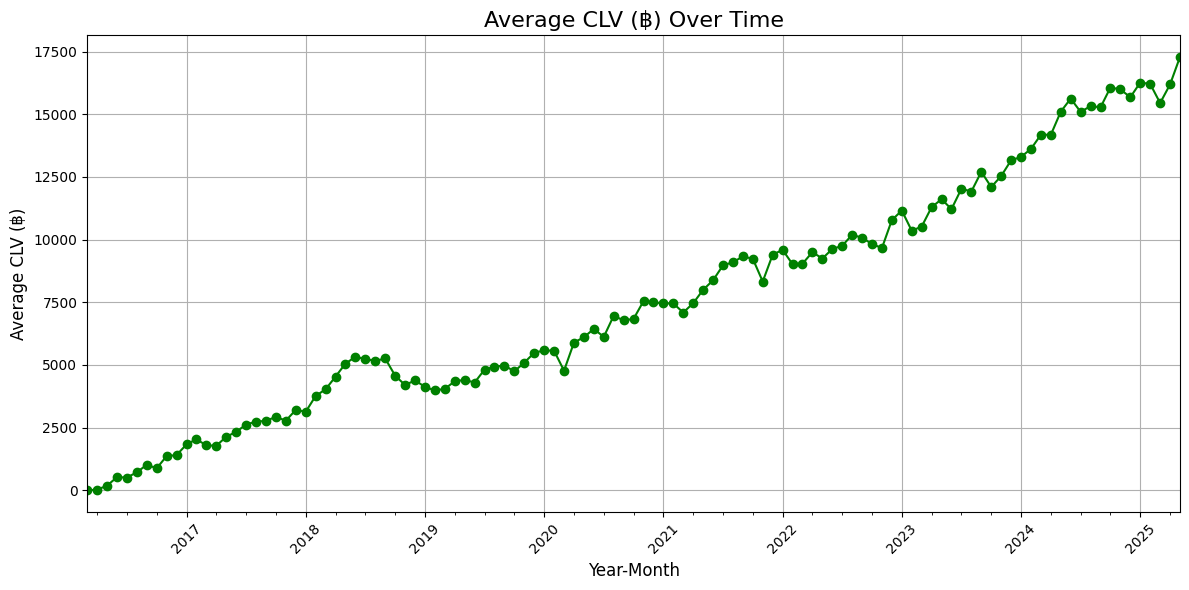

In [33]:
# Calculate average CLV for each month
monthly_avg_clv = df.groupby('year_month')['CLV'].mean()

# Plot average CLV over time
plt.figure(figsize=(12, 6))
monthly_avg_clv.plot(kind='line', marker='o', color='green')
plt.title('Average CLV (฿) Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average CLV (฿)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Average CLV (฿) and Churn Rate (%) Comparison**

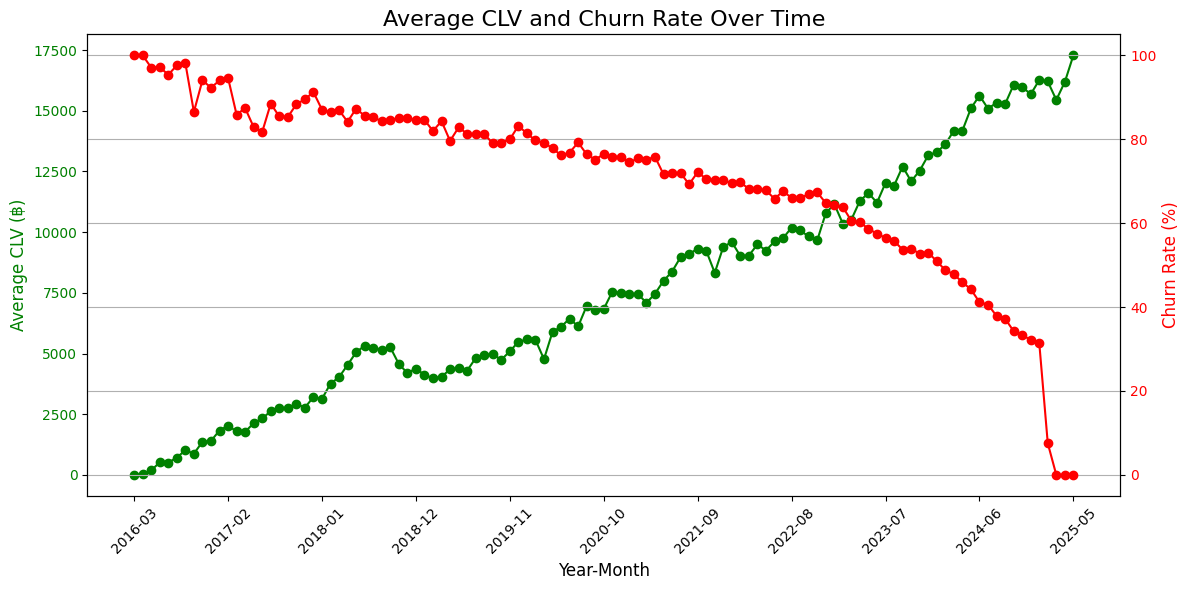

In [35]:
import matplotlib.pyplot as plt

# Extract year and month
df['year_month'] = df['date'].dt.to_period('M')

# Group by year_month
monthly_churn_rate = df.groupby('year_month')['is_churn'].mean() * 100
monthly_avg_clv = df.groupby('year_month')['CLV'].mean()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average CLV on the left
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Average CLV (฿)', color='green', fontsize=12)
ax1.plot(monthly_avg_clv.index.astype(str), monthly_avg_clv, marker='o', color='green', label='Average CLV')
ax1.tick_params(axis='y', labelcolor='green')

# Create second y-axis for churn rate on the right
ax2 = ax1.twinx()
ax2.set_ylabel('Churn Rate (%)', color='red', fontsize=12)
ax2.plot(monthly_churn_rate.index.astype(str), monthly_churn_rate, marker='o', color='red', label='Churn Rate')
ax2.tick_params(axis='y', labelcolor='red')

# Simplify x-axis labels
x_labels = monthly_avg_clv.index.astype(str)
ax1.set_xticks(range(0, len(x_labels), max(1, len(x_labels)//10)))
ax1.set_xticklabels(x_labels[::max(1, len(x_labels)//10)], rotation=45)

# Title and layout
plt.title('Average CLV and Churn Rate Over Time', fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()
